In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.datasets import make_imbalance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import EditedNearestNeighbours, NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()
X= cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X.shape)
print (X_test.shape)
print (y_train.shape)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Komponen dataset: {}" .format(Counter(y)))

(569, 30)
(114, 30)
(455,)
Komponen dataset: Counter({1: 357, 0: 212})


In [3]:
def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

In [4]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

In [5]:
clf_logreg = LogisticRegression(C=0.1, penalty='l2', solver='sag')
clf_logreg.fit(X_train,y_train)

clf_knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto', metric='euclidean')
clf_knn.fit(X_train, y_train)

clf_svm = SVC(gamma=2, C=1)
clf_svm.fit(X_train, y_train)

clf_dt = DecisionTreeClassifier(max_depth=5, criterion='entropy')
clf_dt.fit(X_train, y_train)

clf_rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto')
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


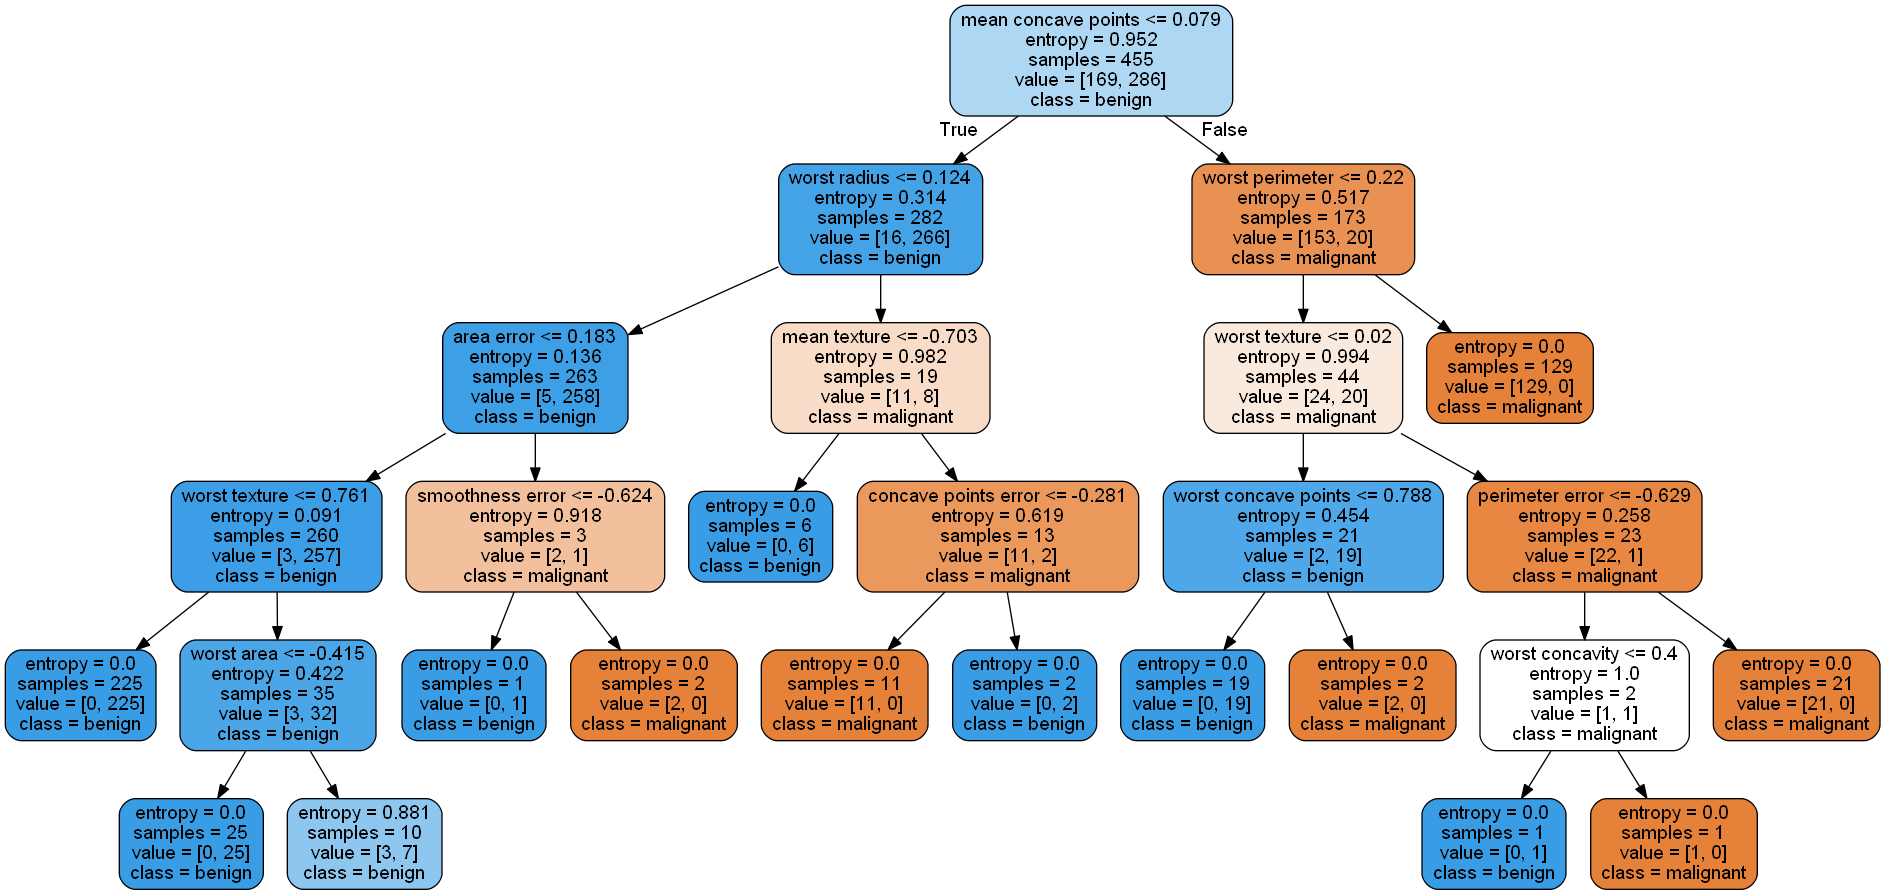

In [6]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz (clf_dt, out_file='tree_breast_cancer.dot',
                 feature_names=cancer.feature_names, class_names=cancer.target_names,
                rounded=True, proportion=False, precision=3, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(filename = 'tree_breast_cancer.png')


In [7]:
print ("Pengukuran Performa terhadap Training Set Set: \n")

names = ["Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine", "Decision Tree", "Random Forest"]
# clf = (clf_logreg,clf_knn, clf_svm, clf_dt,clf_rf)
for classifiers, name in zip ((clf_logreg, clf_knn, clf_svm, clf_dt, clf_rf), names):
    print ("\nHasil klasifikasi training set {}: " .format(name))
    y_pred = classifiers.predict(X_train)

    print(classification_report(y_train, y_pred))    
    G_mean = geometric_mean_score (y_train, y_pred)
    print ("G-Mean untuk {} : "  .format(name) , G_mean)


Pengukuran Performa terhadap Training Set Set: 


Hasil klasifikasi training set Logistic Regression: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       169
           1       0.98      0.99      0.98       286

   micro avg       0.98      0.98      0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455

G-Mean untuk Logistic Regression :  0.9756415970227094

Hasil klasifikasi training set K-Nearest Neighbours: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       169
           1       0.98      1.00      0.99       286

   micro avg       0.98      0.98      0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455

G-Mean untuk K-Nearest Neighbours :  0.9790709277967581

Hasil klasifikasi training set Support Vector Machine: 
              precis

In [8]:
print ("Pengukuran Performa terhadap Testing Set: \n")

names = ["Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine", "Decision Tree", "Random Forest"]
# clf = (clf_logreg,clf_knn, clf_svm, clf_dt,clf_rf)
    
for classifiers, name in zip ((clf_logreg, clf_knn, clf_svm, clf_dt, clf_rf), names):
    print ("\nHasil klasifikasi testing set {}: " .format(name))
    y_pred = classifiers.predict(X_test)

    print(classification_report(y_test, y_pred))
    
    G_mean = geometric_mean_score (y_test, y_pred)
    print ("G-Mean untuk {} : "  .format(name) , G_mean)


Pengukuran Performa terhadap Testing Set: 


Hasil klasifikasi testing set Logistic Regression: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

   micro avg       0.98      0.98      0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

G-Mean untuk Logistic Regression :  0.9764672918705589

Hasil klasifikasi testing set K-Nearest Neighbours: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

   micro avg       0.95      0.95      0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

G-Mean untuk K-Nearest Neighbours :  0.9438892716263839

Hasil klasifikasi testing set Support Vector Machine: 
              precision    r

C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


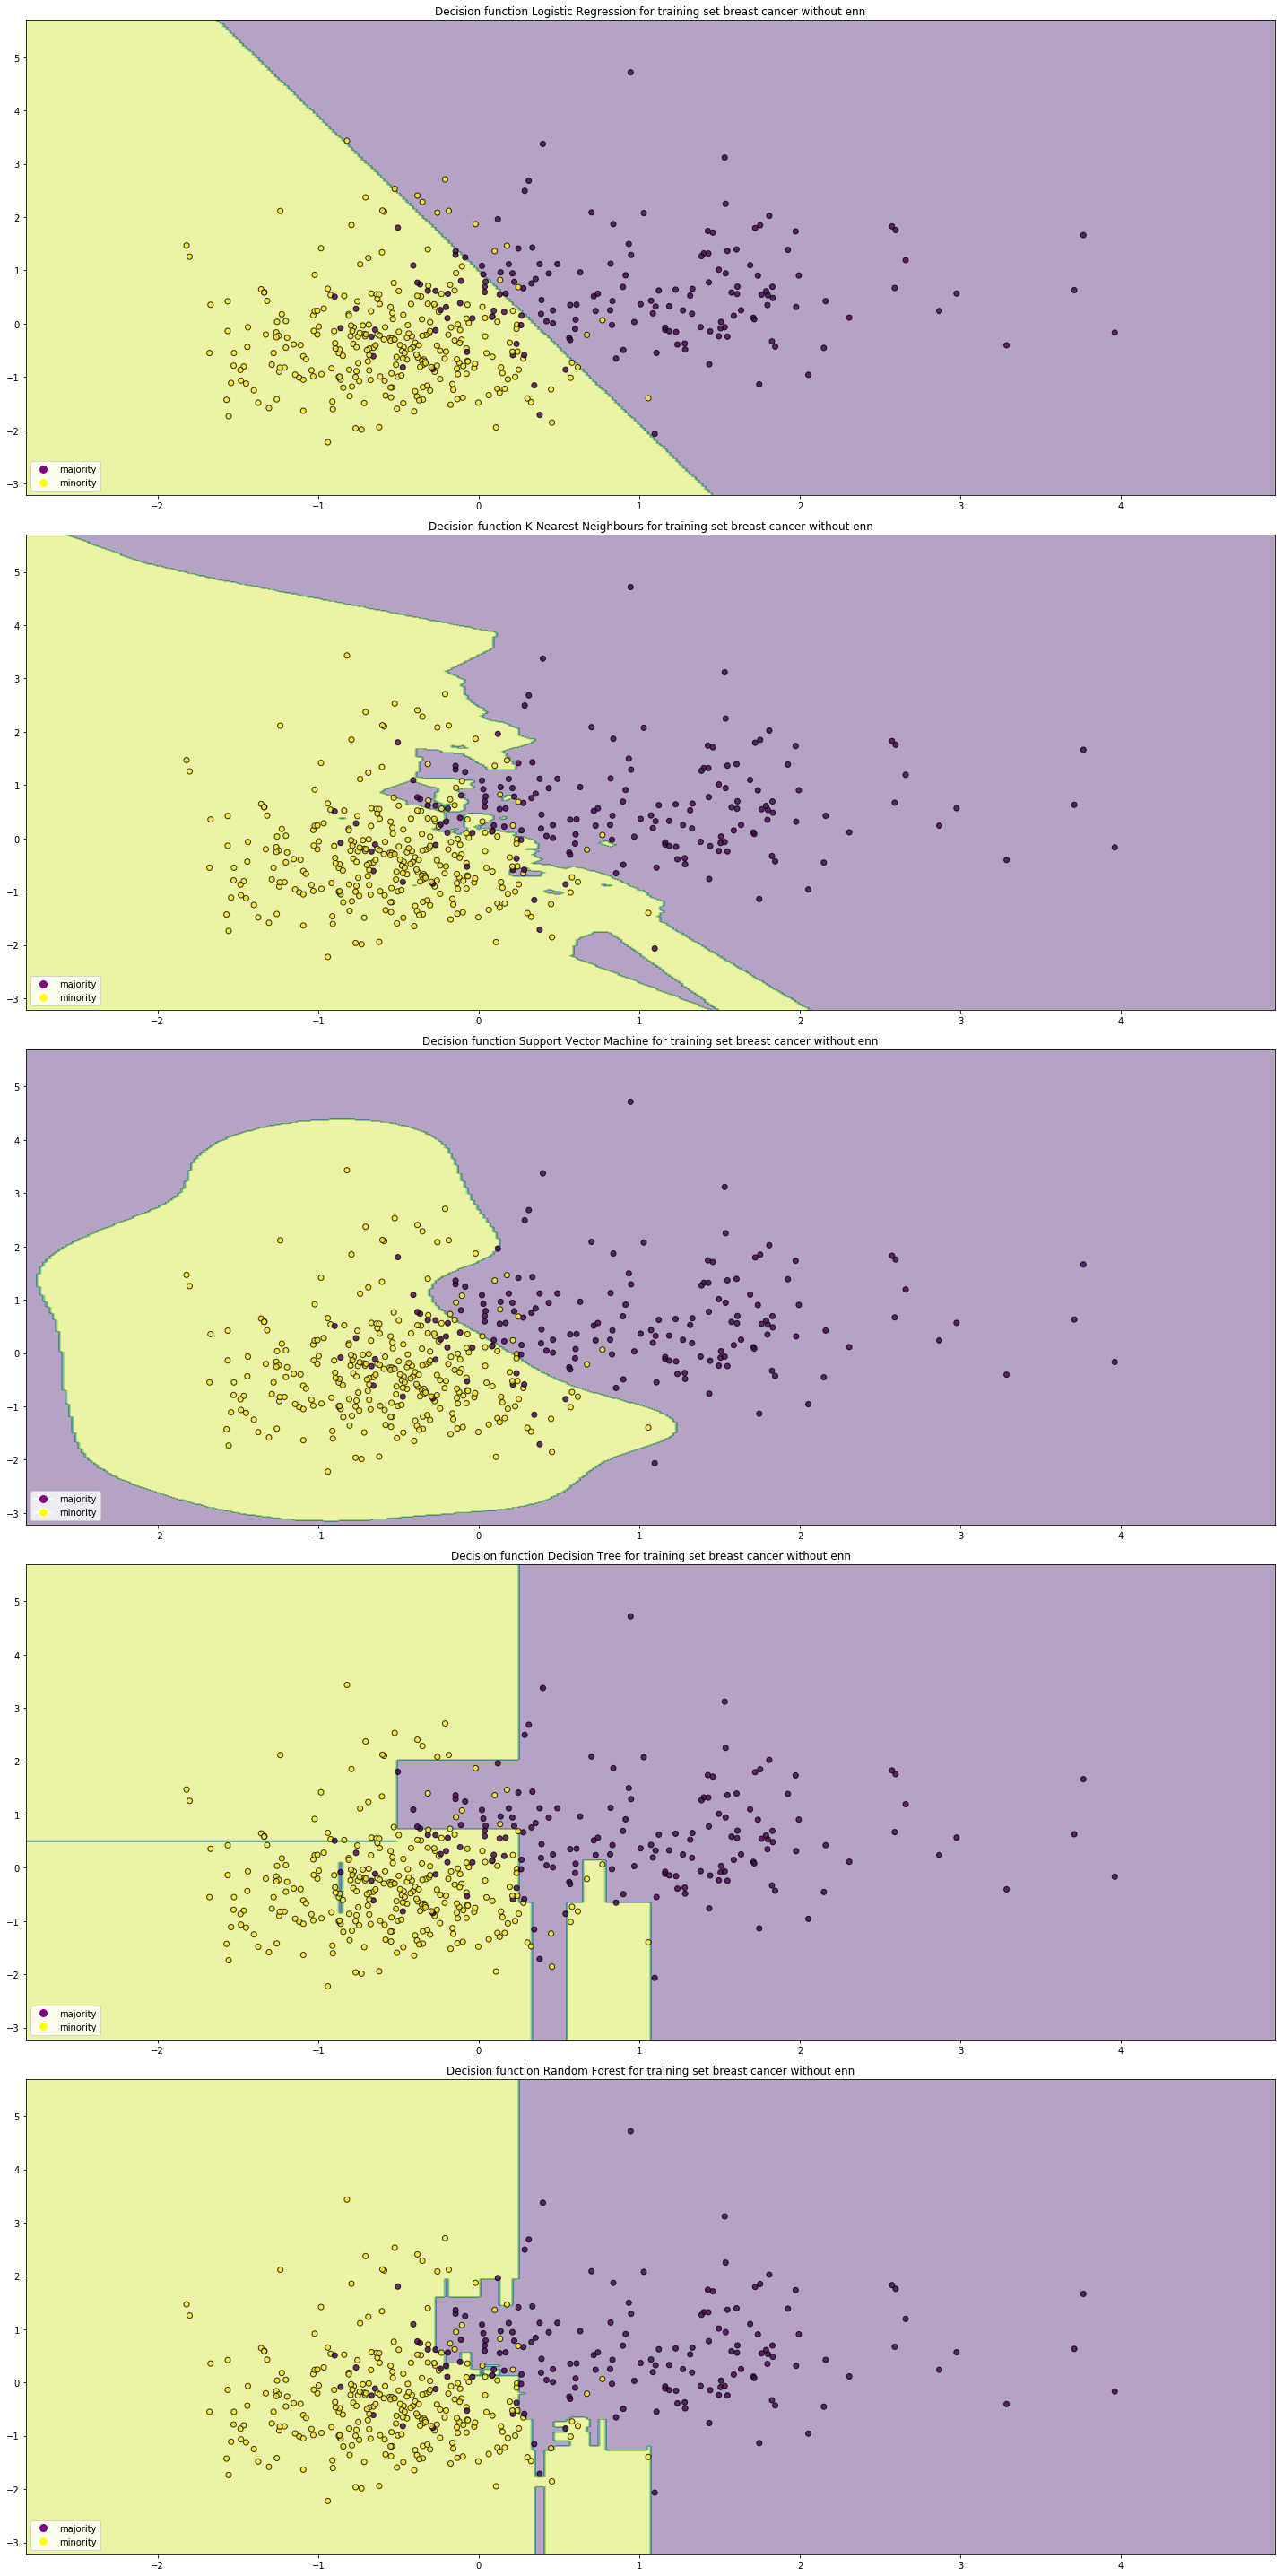

In [9]:
from matplotlib.lines import Line2D

fig, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(5, figsize = (20,40))

# classifiers = [clf_logreg, clf_knn]
ax_arr = ((ax1), (ax2), (ax3), (ax4), (ax5))
names = ["Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine", "Decision Tree", "Random Forest"]

X_train = X_train[:,:2]

for ax, name, classifier in zip (ax_arr, names,  (clf_logreg, clf_knn, clf_svm, clf_dt, clf_rf)):
    classifier.fit(X_train,y_train)
    
    plot_decision_function(X_train, y_train, classifier, ax)
    ax.set_title('Decision function {} for training set breast cancer without enn'.format(name))
    majority=Line2D([], [], color="w", markerfacecolor='purple', marker='o', label='majority', markersize=10)
    minority=Line2D([], [], color="w", markerfacecolor='yellow', marker='o', label='minority', markersize=10)
    ax.legend(handles=[majority,minority], loc='lower left', frameon=True)
fig.tight_layout()
plt.savefig("decision function breast cancer training set withoout enn.pdf")


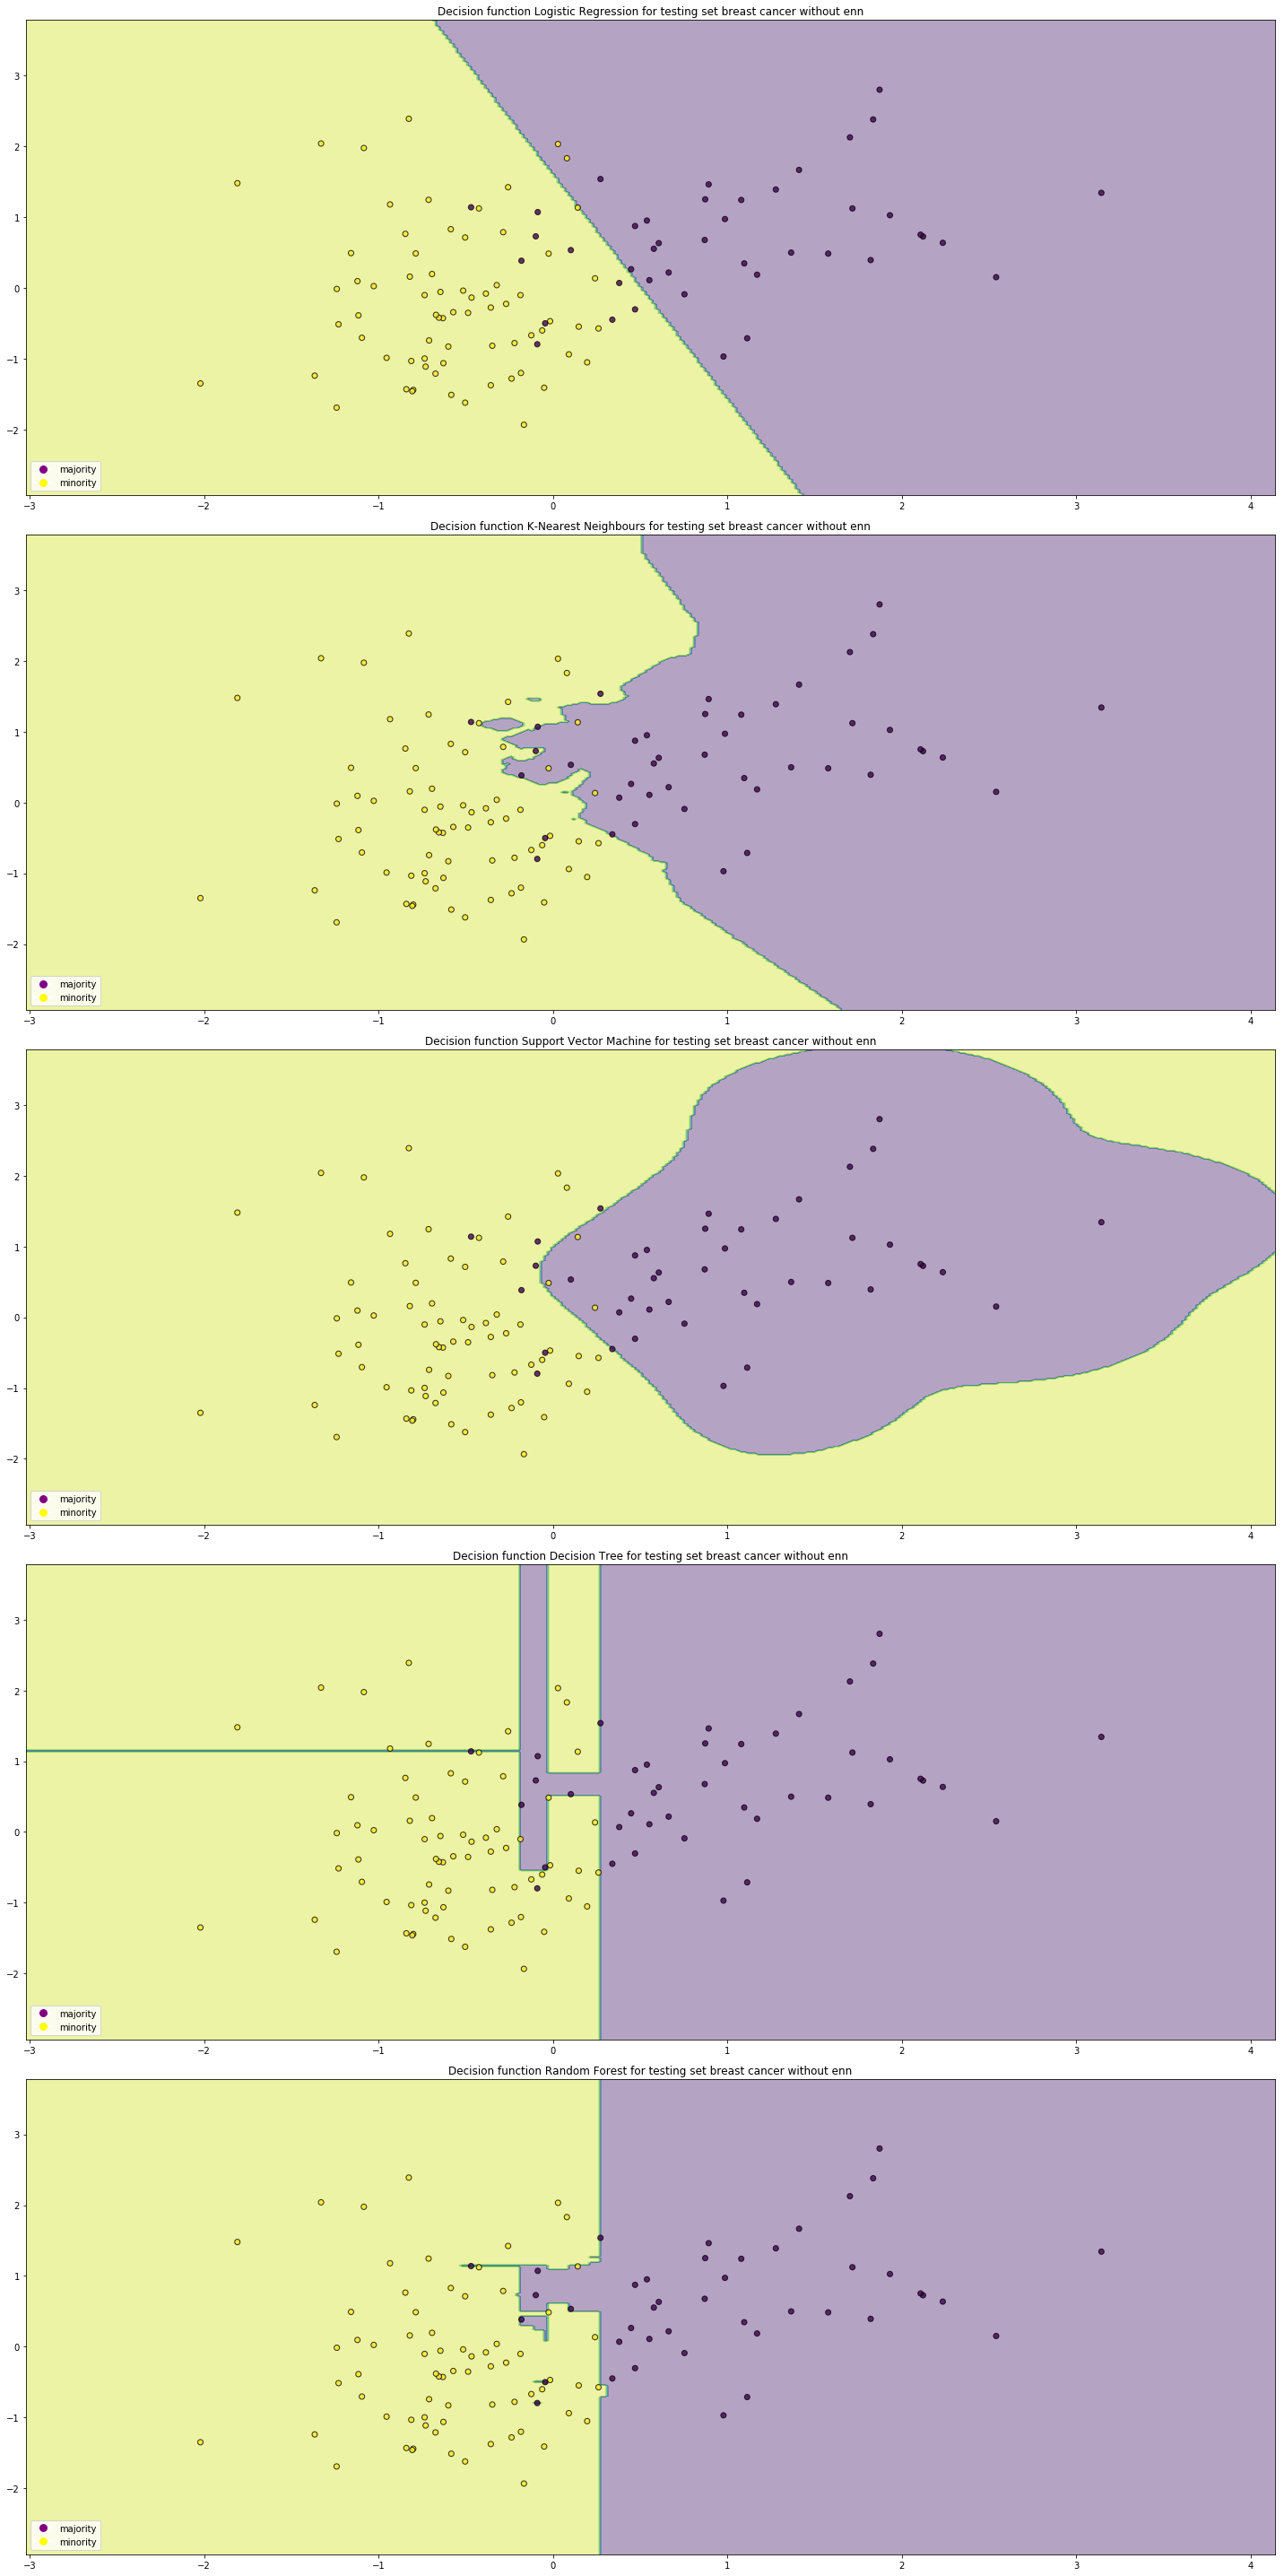

In [10]:
fig, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(5, figsize = (20,40))

# classifiers = [clf_logreg, clf_knn]
ax_arr = ((ax1), (ax2), (ax3), (ax4), (ax5))
names = ["Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine", "Decision Tree", "Random Forest"]

X_test = X_test[:,:2]

for ax, name, classifier in zip (ax_arr, names,  (clf_logreg, clf_knn, clf_svm, clf_dt, clf_rf)):
    classifier.fit(X_test,y_test)
    
    plot_decision_function(X_test, y_test, classifier, ax)
    ax.set_title('Decision function {} for testing set breast cancer without enn'.format(name))
    majority=Line2D([], [], color="w", markerfacecolor='purple', marker='o', label='majority', markersize=10)
    minority=Line2D([], [], color="w", markerfacecolor='yellow', marker='o', label='minority', markersize=10)
    ax.legend(handles=[majority,minority], loc='lower left', frameon=True)
fig.tight_layout()
plt.savefig("decision function breast cancer testing set without enn.pdf")
